In [1]:
import h5py as h5
import sys
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
from scipy.interpolate import make_smoothing_spline, make_splrep, interp1d

In [17]:
f = h5.File('/sdf/data/neutrino/summer25/seohyeon/edep-sim_h5_54k_raw/muon_0-1gev_run3.h5')
trajs = f['trajectories']
segs = f['segments']

ev_n = 780
ev_mask_traj = trajs['event_id'] == ev_n
trajs = trajs[ev_mask_traj]
ev_mask_seg = segs['event_id'] == ev_n
segs = segs[ev_mask_seg]


muon_mask_traj = trajs['traj_id'] == 0
muon_traj = trajs[muon_mask_traj]

muon_mask_seg = segs['traj_id']==0
muon_segs = segs[muon_mask_seg]

delta_mask = (trajs['pdg_id'] == 11) & (trajs['parent_id'] == 0)
delta_trajs = trajs[delta_mask]

print(f'end momentum: {muon_traj["pxyz_end"]}')
print(f'muon KE: {muon_traj["E_start"] - 105.7}')
edep = muon_segs['dE'].sum()
print(f'energy deposited: {edep}')
print(f'n deltas: {len(delta_trajs)}')


start = muon_traj['xyz_start']
start = start[0]
stop = muon_traj['xyz_end']
stop = stop[0]
distance_vector = np.subtract(stop, start)
length = np.linalg.norm(distance_vector) * 10 #mm
print(f'track naive length: {length}')

# print()
# print(trajs['pdg_id'])
# print()


# child_mask = trajs['parent_id'] == 0
# children = trajs[child_mask]
# print(children['pdg_id'])

# neutron_mask = children['pdg_id'] == 2112
# neutrons = children[neutron_mask]
# print(len(neutrons['pdg_id']))

for traj in trajs:
    if traj['parent_id']==0:
        print('-----')
        print(traj['pdg_id'])
        print(traj['start_process'])
        print(traj['start_subprocess'])

end momentum: [[ 0. -0. -0.]]
muon KE: [894.4117]
energy deposited: 569.913330078125
n deltas: 46
track naive length: 2855.58447265625
-----
-11
6
201
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
1000160340
4
121
-----
2112
4
121
-----
2112
4
121
-----
2112
4
121
-----
22
4
121
-----
22
4
121
-----
22
4
121
-----
2112
4
121
-----
2212
4
121
-----
2212
4
121
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2
-----
11
2
2


In [15]:
# getting path length -------------
# getting segments in muon track only
seg_starts = np.array([[seg['x_start'], seg['y_start'], seg['z_start']] for seg in muon_segs])
seg_ends = np.array([[seg['x_end'], seg['y_end'], seg['z_end']] for seg in muon_segs])

path_length = 0

if np.any(start != seg_starts[0]):
    path_length += np.linalg.norm(start - seg_starts[0])
    print('mismatch')
    print(start)
    print(seg_starts[0])
    print(len(seg_starts))
elif np.any(stop != seg_ends[-1]):
    path_length += np.linalg.norm(stop - seg_ends[-1])
    print('mismatch')
    print(start)
    print(seg_starts[0])
    print(len(seg_starts))

for i, seg in enumerate(muon_segs):
    if i+1 == len(muon_segs):
        path_length += np.linalg.norm(seg_ends[i] - seg_starts[i]) 
    else:
        path_length += np.linalg.norm(seg_ends[i] - seg_starts[i]) 
        path_length += np.linalg.norm(seg_starts[i+1] - seg_ends[i]) 

print(path_length * 10)


2304.005


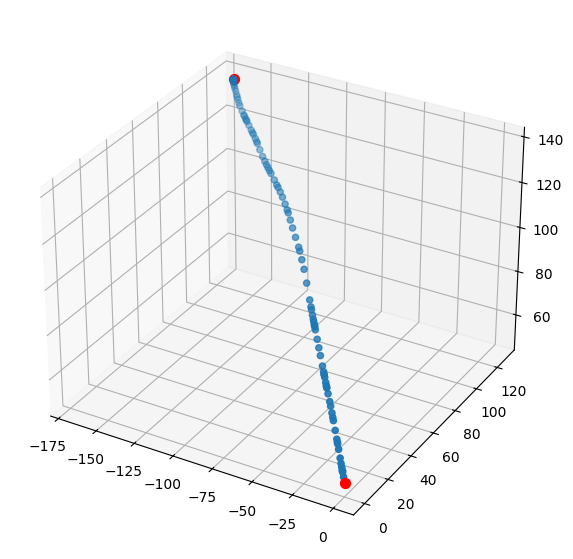

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(muon_segs['x'], muon_segs['y'], muon_segs['z'], 'o')
ax.scatter(*start, 'o', color='red', s=50) 
ax.scatter(*stop, 'o', color='red', s=50)